Train shape: (1460, 81)
Test shape: (1459, 80)


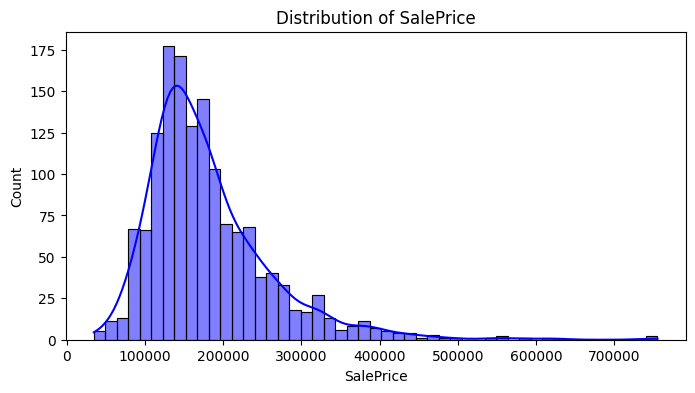

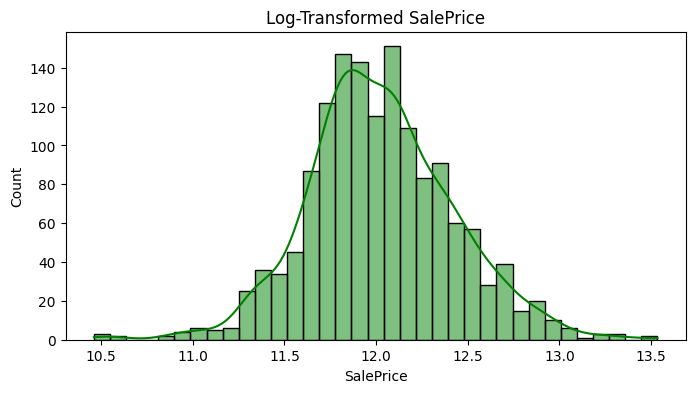

<Figure size 1200x500 with 0 Axes>

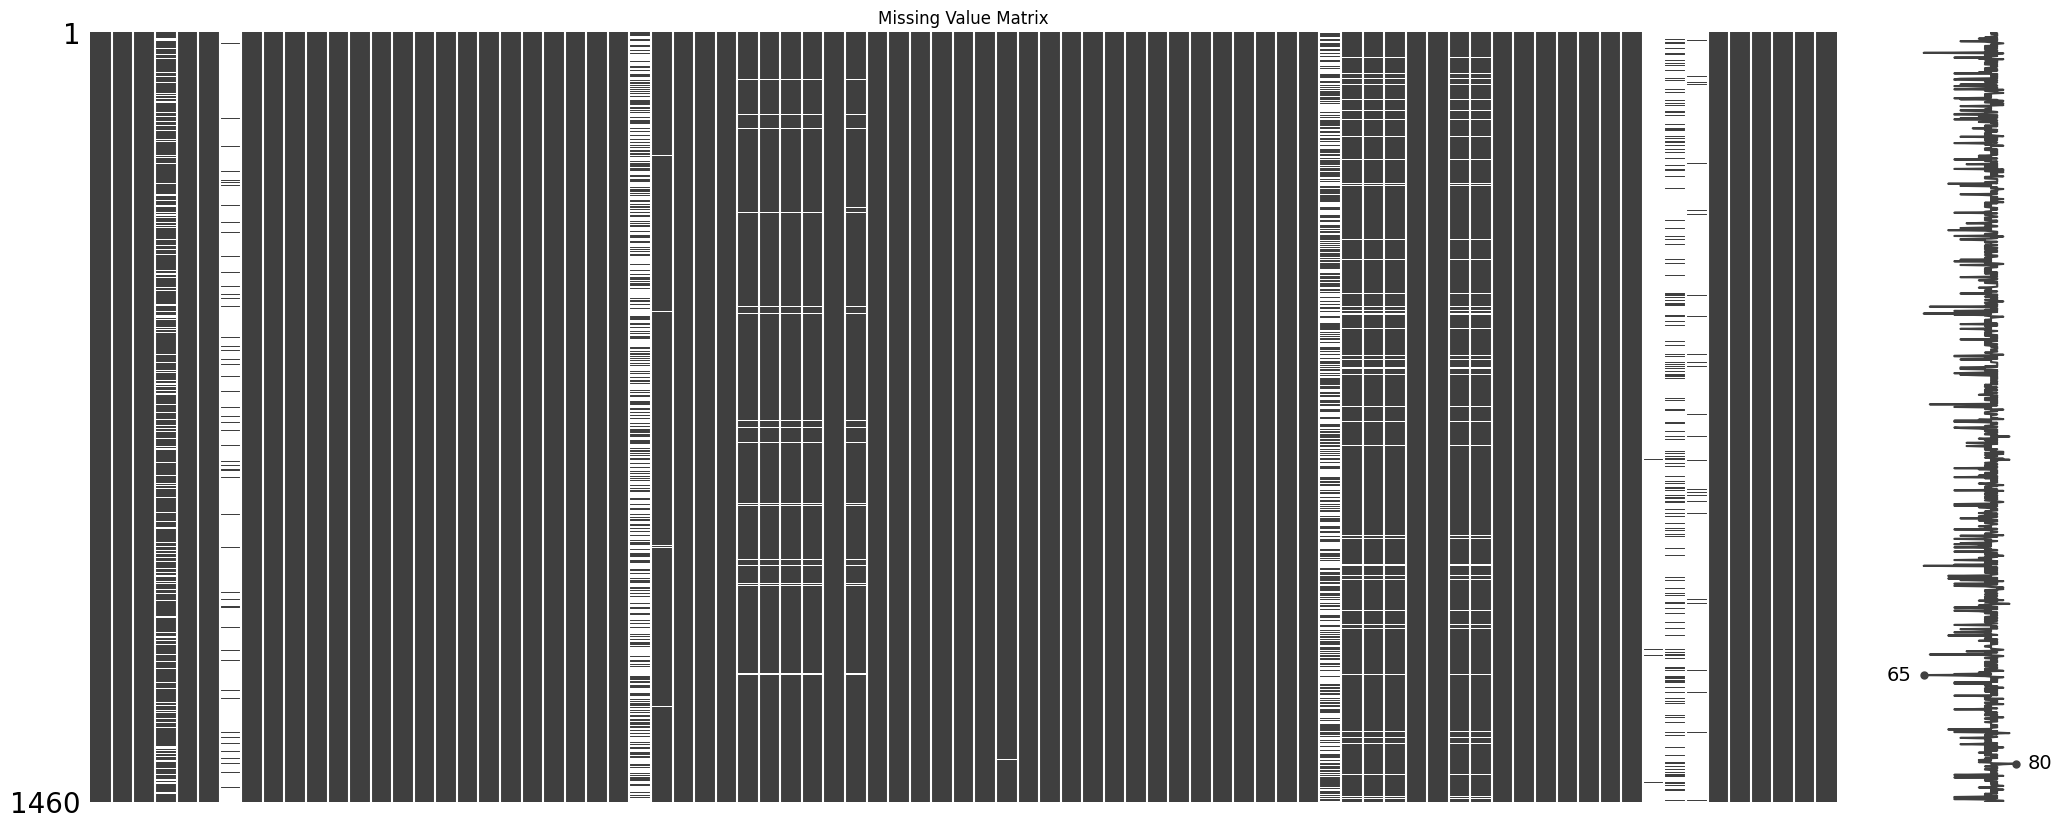

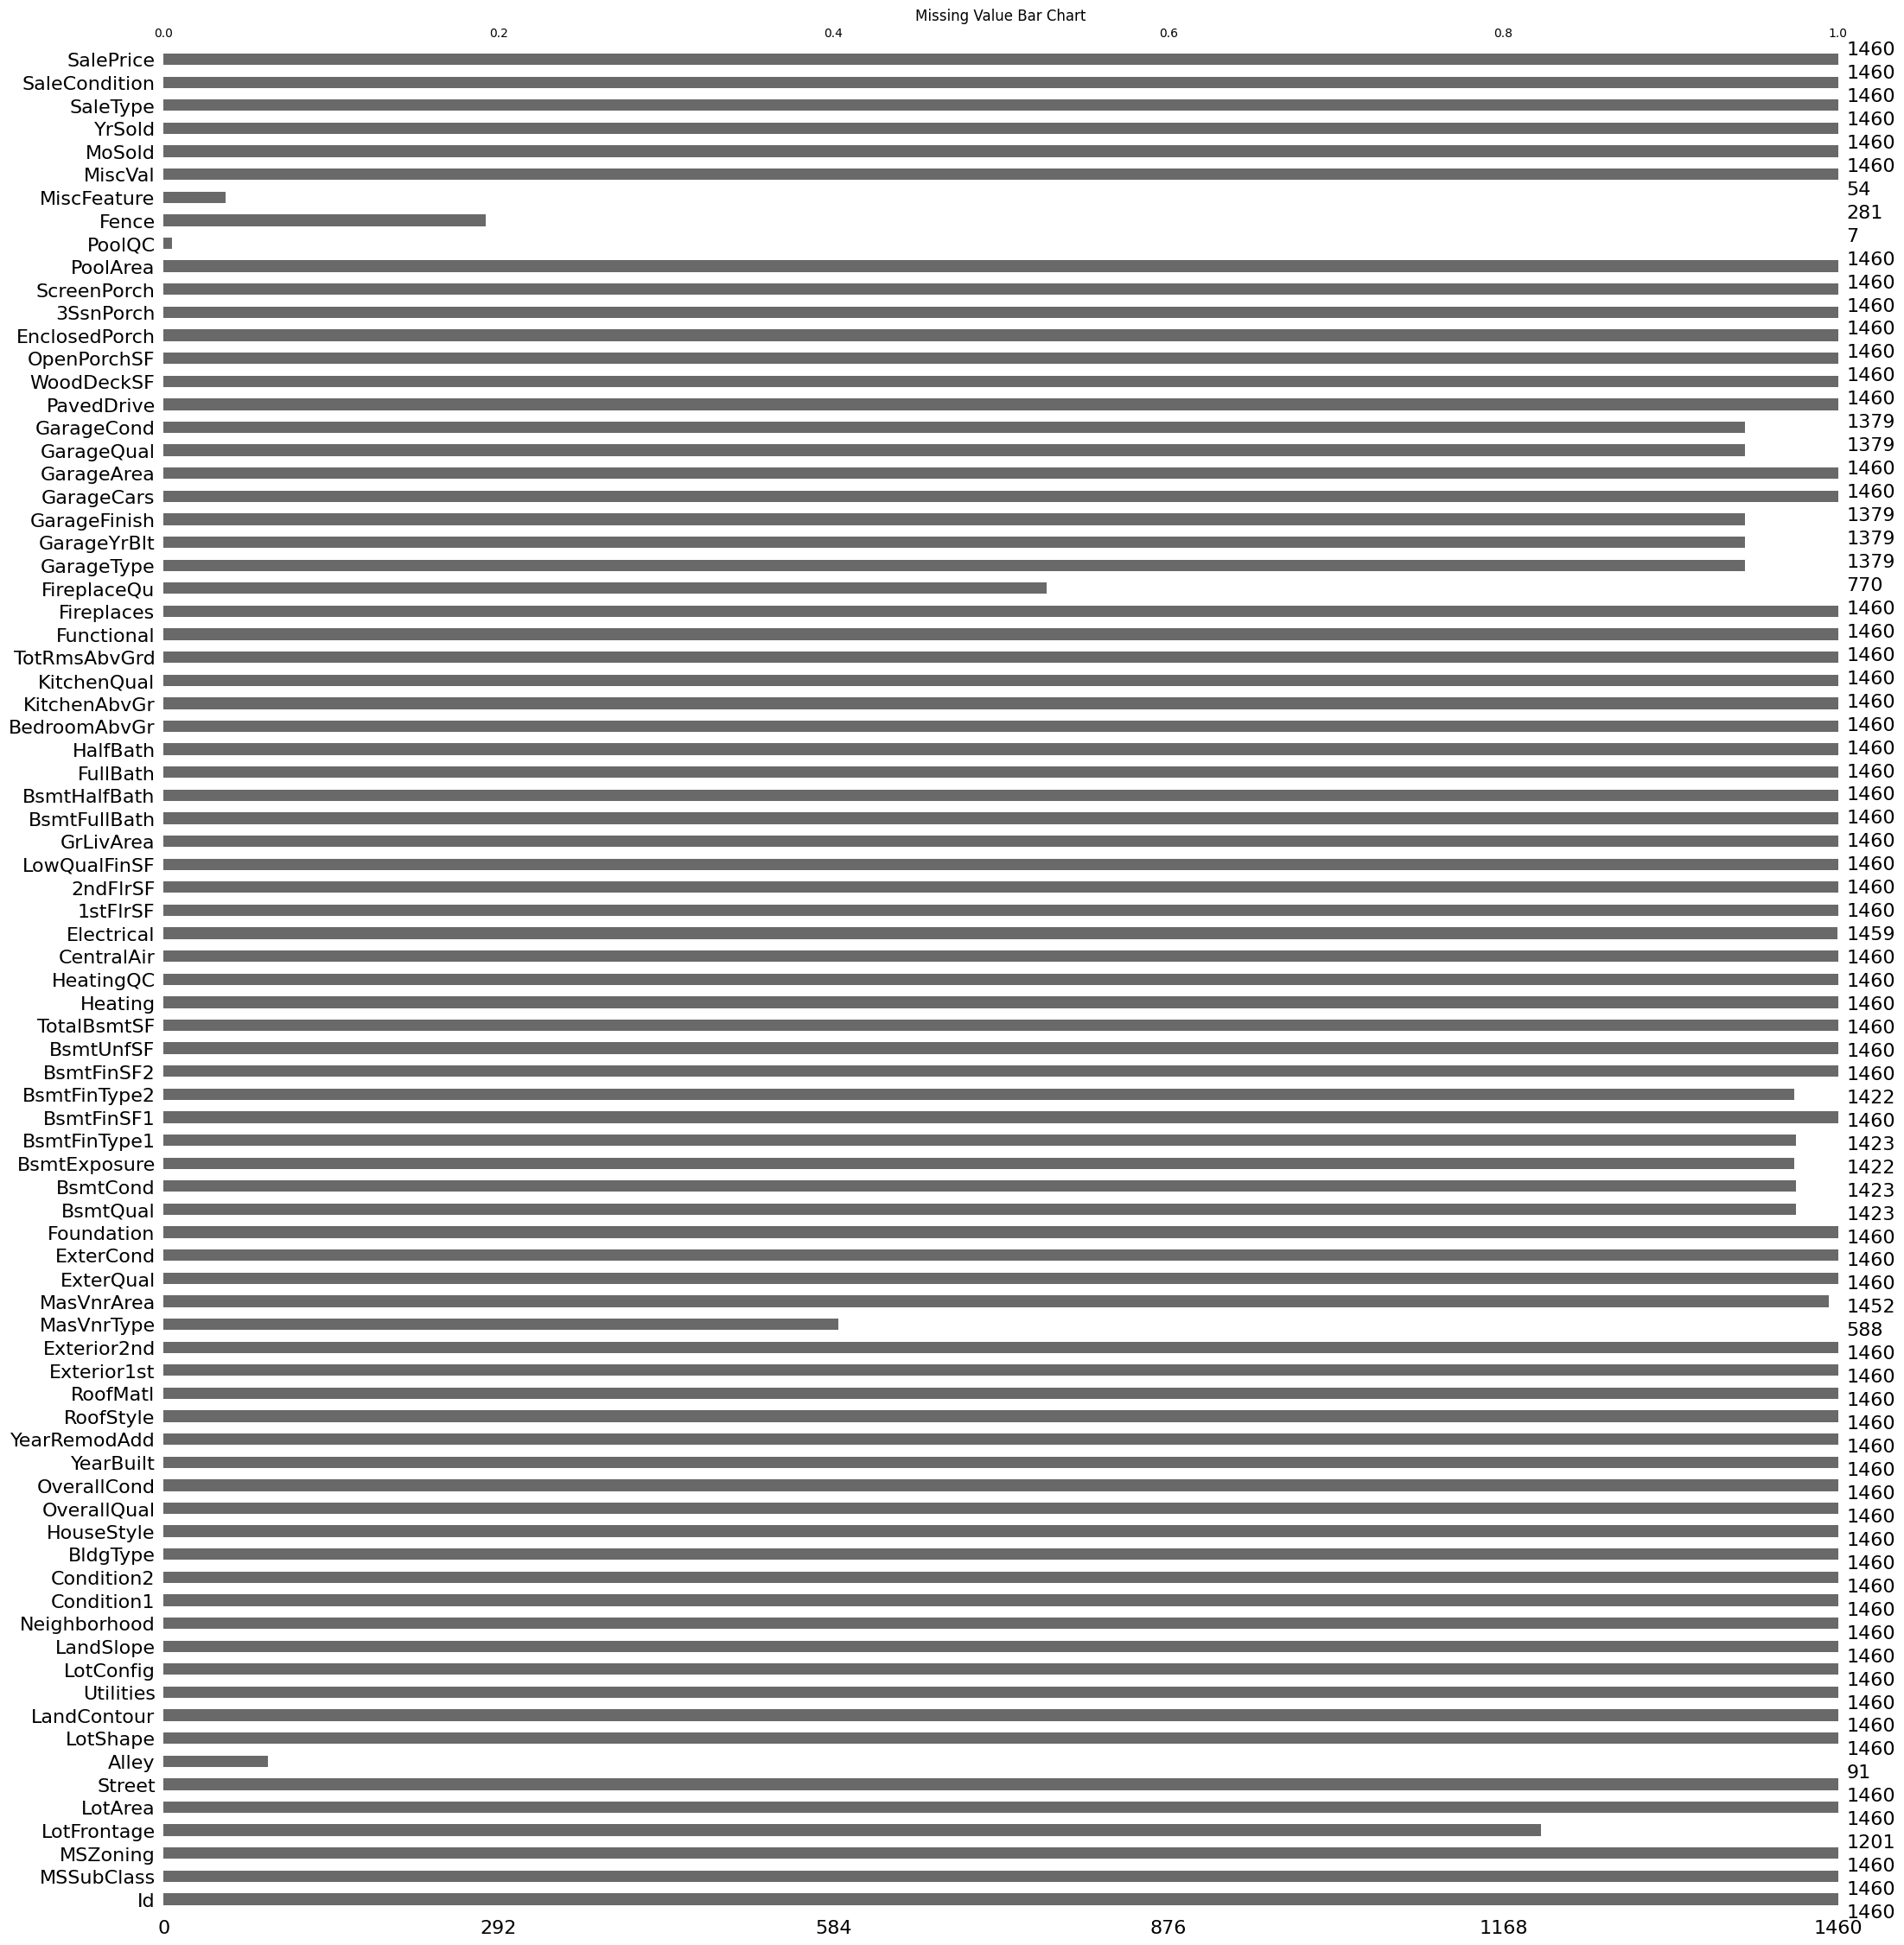

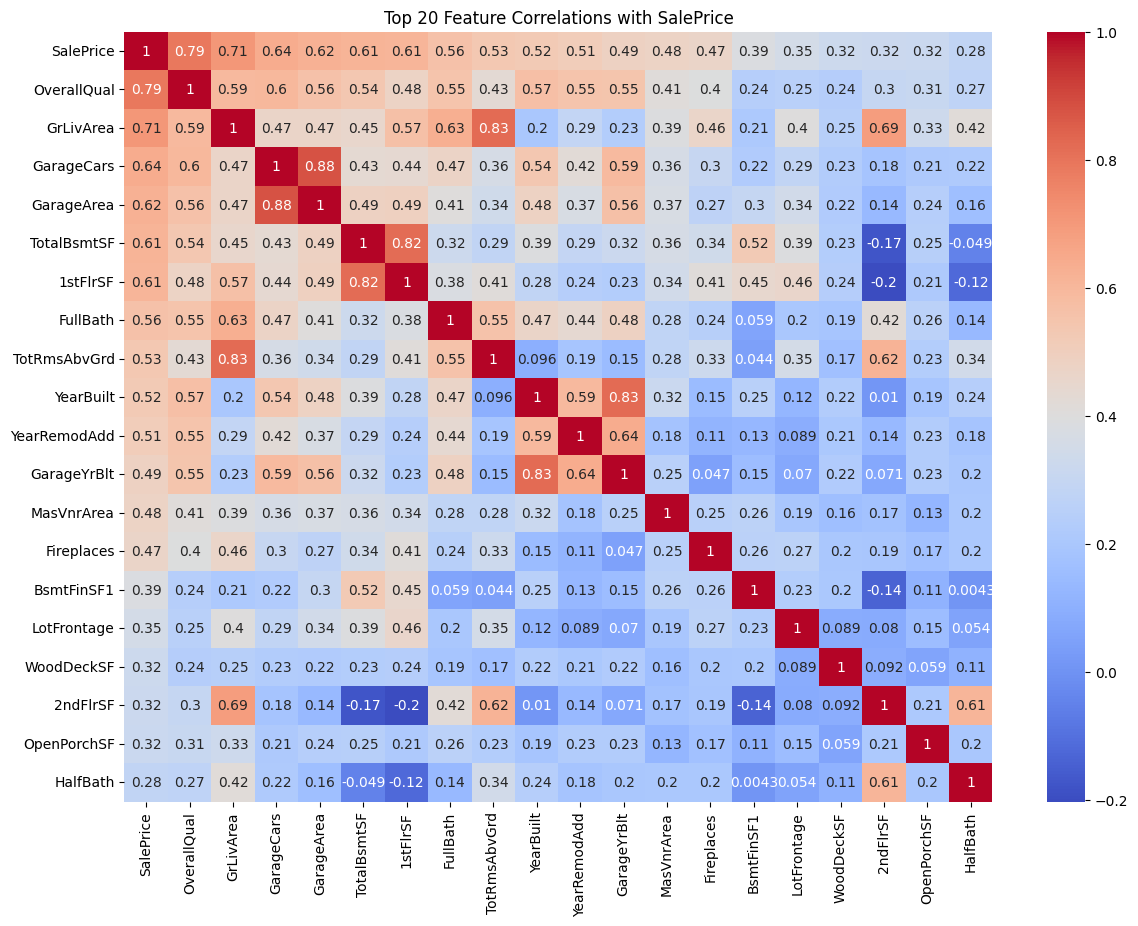

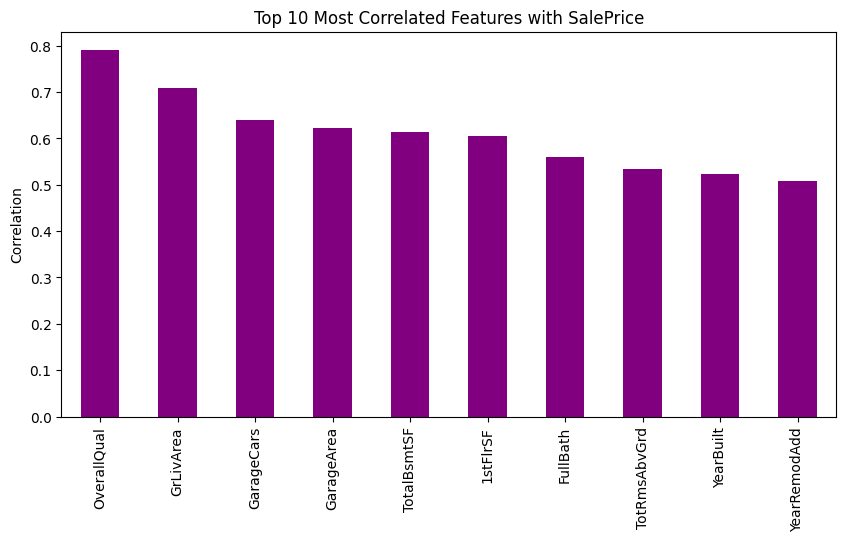

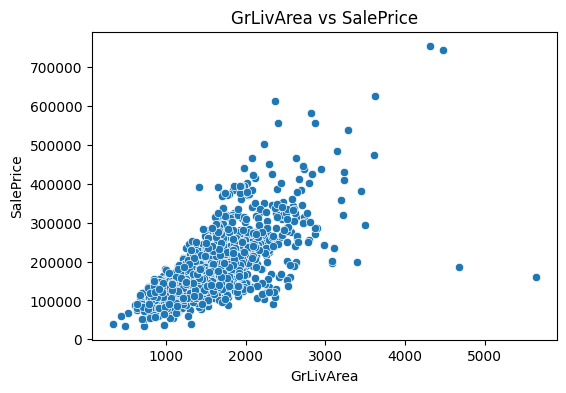

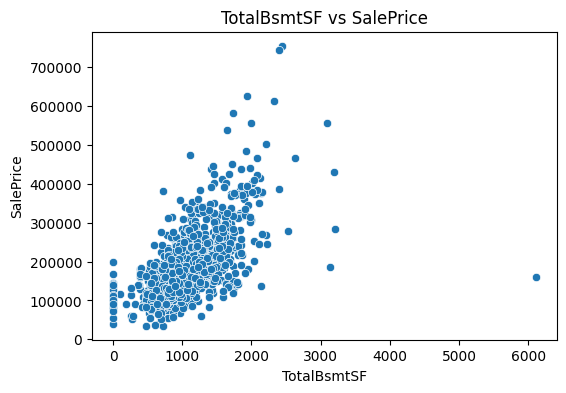

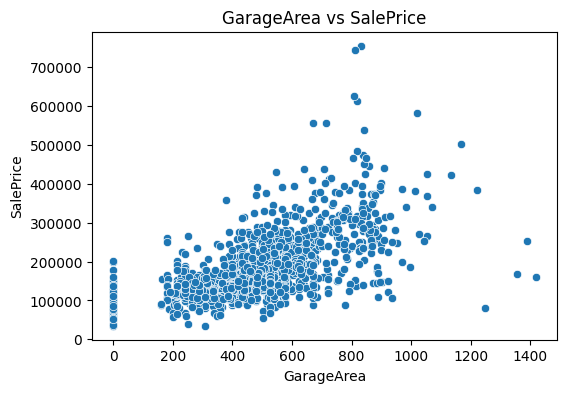

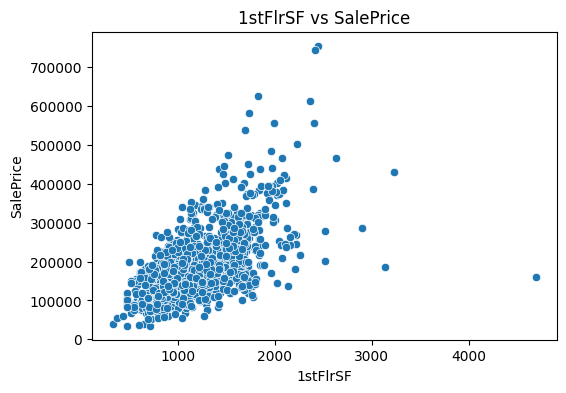

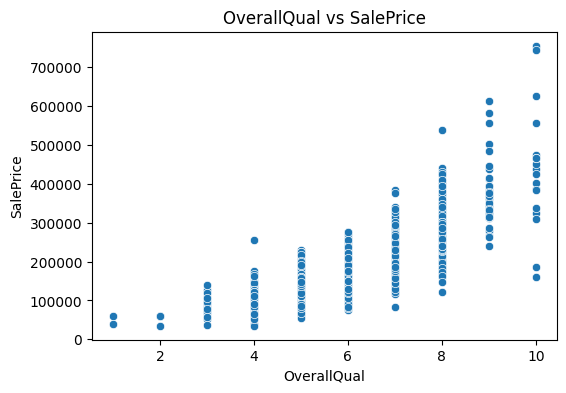

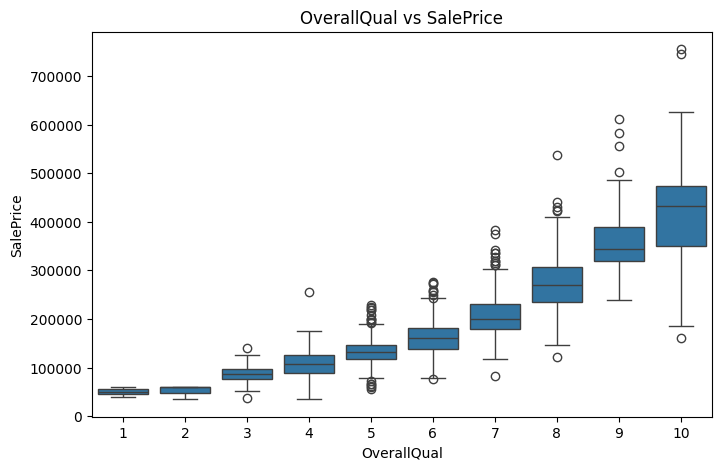

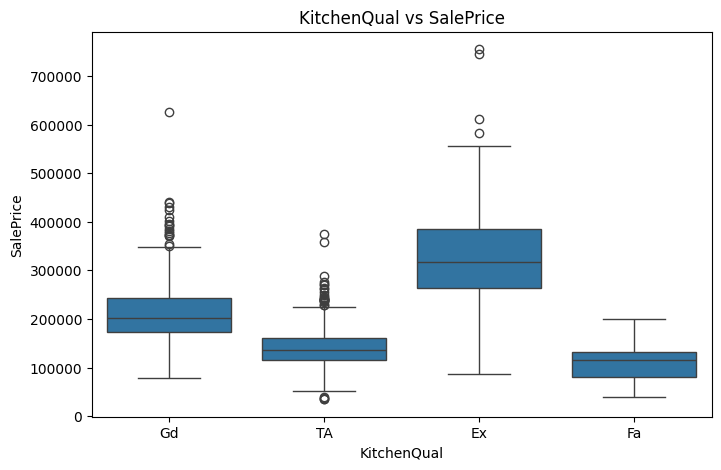

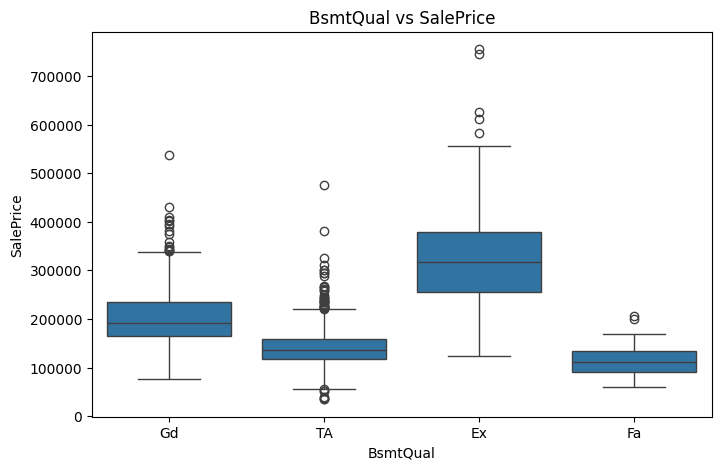

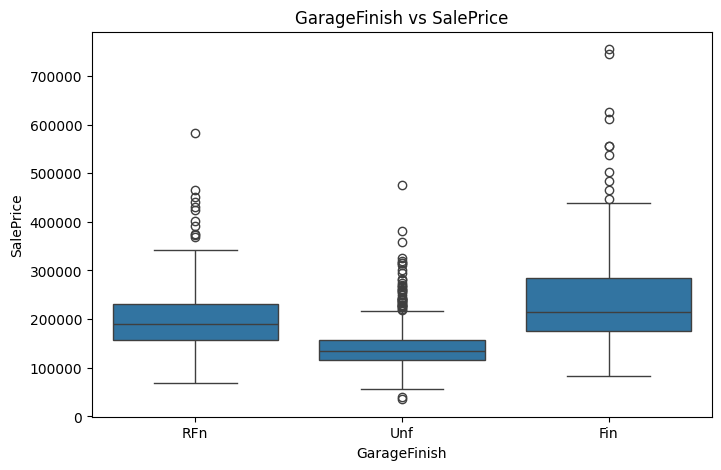


Shapes after encoding:
Train: (1460, 302)
Test: (1459, 302)
Original numeric feature count: 37
Numeric-only scaled shape: (1460, 37)

Data Ready!
X_train: (1168, 37)
X_valid: (292, 37)
y_train: (1168,)
y_valid: (292,)

Data Ready!
X_train: (1168, 37)
X_valid: (292, 37)
y_train: (1168,)
y_valid: (292,)


In [1]:
# ============================================================
# 1. IMPORT LIBRARIES
# ============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# ============================================================
# 2. LOAD DATA
# ============================================================
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)


# ============================================================
# 3. EDA — VISUALIZATIONS
# ============================================================

# -------------------- SalePrice distribution --------------------
plt.figure(figsize=(8,4))
sns.histplot(train["SalePrice"], kde=True, color="blue")
plt.title("Distribution of SalePrice")
plt.show()

# Log-transform SalePrice
plt.figure(figsize=(8,4))
sns.histplot(np.log1p(train["SalePrice"]), kde=True, color="green")
plt.title("Log-Transformed SalePrice")
plt.show()


# -------------------- Missing value map --------------------
plt.figure(figsize=(12,5))
msno.matrix(train)
plt.title("Missing Value Matrix")
plt.show()

plt.figure(figsize=(12,5))
msno.bar(train)
plt.title("Missing Value Bar Chart")
plt.show()


# -------------------- Correlation heatmap --------------------
plt.figure(figsize=(14,10))
corr = train.corr(numeric_only=True)
top_corr = corr["SalePrice"].sort_values(ascending=False).head(20)
sns.heatmap(train[top_corr.index].corr(), annot=True, cmap="coolwarm")
plt.title("Top 20 Feature Correlations with SalePrice")
plt.show()

# Bar plot of top correlated features
plt.figure(figsize=(10,5))
top_corr.head(11).drop("SalePrice").plot(kind="bar", color="purple")
plt.title("Top 10 Most Correlated Features with SalePrice")
plt.ylabel("Correlation")
plt.show()


# -------------------- Scatter plots (important numeric features) --------------------
important_features = ["GrLivArea", "TotalBsmtSF", "GarageArea", "1stFlrSF", "OverallQual"]

for col in important_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=train[col], y=train["SalePrice"])
    plt.title(f"{col} vs SalePrice")
    plt.show()


# -------------------- Boxplots for categorical quality features --------------------
categorical_features = ["OverallQual", "KitchenQual", "BsmtQual", "GarageFinish"]

for col in categorical_features:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=train[col], y=train["SalePrice"])
    plt.title(f"{col} vs SalePrice")
    plt.show()



# ============================================================
# 4. TARGET VARIABLE
# ============================================================
target = "SalePrice"
y = train[target]
X = train.drop(columns=["SalePrice"])


# ============================================================
# 5. HANDLE MISSING VALUES
# ============================================================

# A. Categorical columns meaning "No feature"
none_fill = [
    'Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
    'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',
    'PoolQC','Fence','MiscFeature'
]

for col in none_fill:
    if col in X.columns:
        X[col] = X[col].fillna("None")
        test[col] = test[col].fillna("None")

# B. Numeric missing → median
num_cols = X.select_dtypes(include=[np.number]).columns
for col in num_cols:
    median = X[col].median()
    X[col] = X[col].fillna(median)
    test[col] = test[col].fillna(median)

# C. Categorical missing → mode
cat_cols = X.select_dtypes(include=["object"]).columns
for col in cat_cols:
    mode = X[col].mode()[0]
    X[col] = X[col].fillna(mode)
    test[col] = test[col].fillna(mode)



# ============================================================
# 6. ENCODE CATEGORICAL VARIABLES
# ============================================================
X = pd.get_dummies(X)
test = pd.get_dummies(test)

# Align columns to match
X, test = X.align(test, join="left", axis=1)
test = test.fillna(0)

print("\nShapes after encoding:")
print("Train:", X.shape)
print("Test:", test.shape)


# ============================================================
# 7. REDUCE TO NUMERIC FEATURES + SCALE PROPERLY  (RESTORED VERSION)
# ============================================================

# select ONLY original numeric columns
numeric_cols = train.select_dtypes(include=['int64','float64']).columns
numeric_cols = numeric_cols.drop("SalePrice")  # remove target

print("Original numeric feature count:", len(numeric_cols))

# Extract numeric-only dataset
X_num = X[numeric_cols]
test_num = test[numeric_cols]

# Scale numeric-only
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)
test_scaled = scaler.transform(test_num)

print("Numeric-only scaled shape:", X_scaled.shape)


# ============================================================
# 8. FINAL TRAIN/VALIDATION SPLIT (numeric-only for NN)
# ============================================================
X_train, X_valid, y_train, y_valid = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("\nData Ready!")
print("X_train:", X_train.shape)
print("X_valid:", X_valid.shape)
print("y_train:", y_train.shape)
print("y_valid:", y_valid.shape)




# ============================================================
# 8. FINAL TRAIN/VALIDATION SPLIT
# ============================================================
X_train, X_valid, y_train, y_valid = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("\nData Ready!")
print("X_train:", X_train.shape)
print("X_valid:", X_valid.shape)
print("y_train:", y_train.shape)
print("y_valid:", y_valid.shape)

Top 10 correlated features: ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']

Testing degree = 2
Polynomial features = 65
Alpha=0.1 → RMSE=34164.73
Alpha=1 → RMSE=34011.48
Alpha=5 → RMSE=33495.47
Alpha=10 → RMSE=33076.21
Alpha=20 → RMSE=32586.67
Alpha=50 → RMSE=32044.96
Alpha=100 → RMSE=31918.12
Alpha=200 → RMSE=32226.31

Testing degree = 3
Polynomial features = 285
Alpha=0.1 → RMSE=65091.76
Alpha=1 → RMSE=53760.37
Alpha=5 → RMSE=43978.16
Alpha=10 → RMSE=40988.61
Alpha=20 → RMSE=38902.40
Alpha=50 → RMSE=37063.92
Alpha=100 → RMSE=36146.19
Alpha=200 → RMSE=35725.86

================ BEST POLYNOMIAL MODEL ================
Best Degree     : 2
Best Alpha (λ)  : 100
Best RMSE       : 31918.115666746675

========== FINAL PERFORMANCE ==========
MSE : 1018766107.7158195
RMSE: 31918.115666746675
MAE : 20080.86873669494


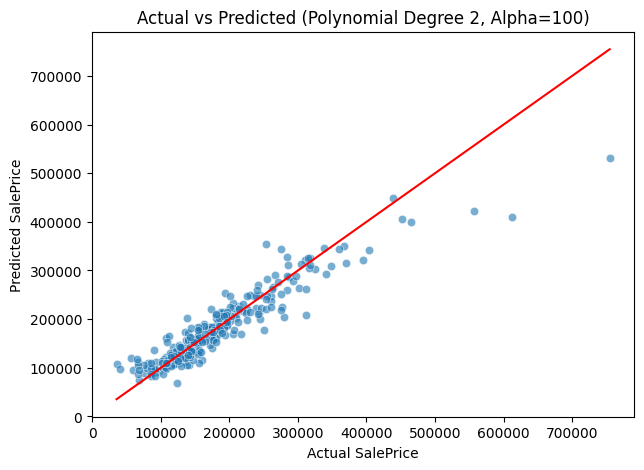

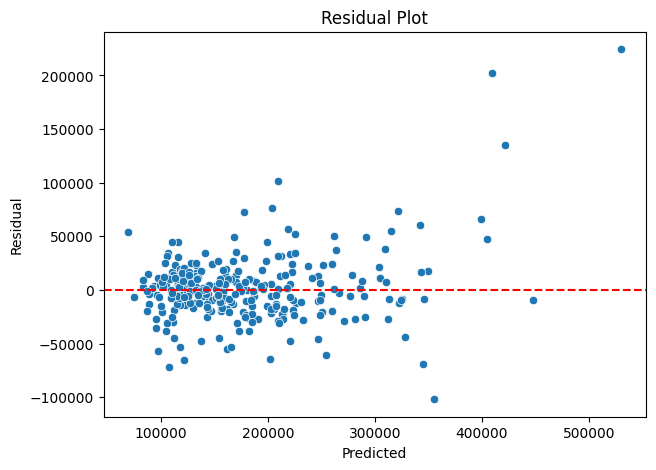

In [2]:
# ============================================================
# OPTIMIZED POLYNOMIAL REGRESSION + RIDGE (D2 & D3 + GRID SEARCH)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# -----------------------------
# Load data
# -----------------------------
train = pd.read_csv("train.csv")

# -----------------------------
# Select top 10 correlated features
# -----------------------------
corr = train.corr(numeric_only=True)["SalePrice"].abs().sort_values(ascending=False)
top10 = corr.head(11).index.tolist()
top10.remove("SalePrice")

print("Top 10 correlated features:", top10)

X = train[top10]
y = train["SalePrice"]

# -----------------------------
# Train/validation split
# -----------------------------
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# Standardization
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# -----------------------------
# Grid Search for Polynomial Degree + Ridge Alpha
# -----------------------------
degrees = [2, 3]
alphas = [0.1, 1, 5, 10, 20, 50, 100, 200]

best_rmse = float("inf")
best_model = None
best_deg = None
best_alpha = None
best_poly = None

for deg in degrees:
    poly = PolynomialFeatures(deg, include_bias=False)

    X_train_poly = poly.fit_transform(X_train_scaled)
    X_valid_poly = poly.transform(X_valid_scaled)

    print(f"\nTesting degree = {deg}")
    print(f"Polynomial features = {X_train_poly.shape[1]}")

    for alpha in alphas:
        model = Ridge(alpha=alpha)
        model.fit(X_train_poly, y_train)
        y_pred = model.predict(X_valid_poly)

        rmse = np.sqrt(mean_squared_error(y_valid, y_pred))

        print(f"Alpha={alpha} → RMSE={rmse:.2f}")

        if rmse < best_rmse:
            best_rmse = rmse
            best_model = model
            best_deg = deg
            best_alpha = alpha
            best_poly = poly

# -----------------------------
# Final best model results
# -----------------------------
print("\n================ BEST POLYNOMIAL MODEL ================")
print(f"Best Degree     : {best_deg}")
print(f"Best Alpha (λ)  : {best_alpha}")
print(f"Best RMSE       : {best_rmse}")

# -----------------------------
# Make final predictions
# -----------------------------
X_train_poly = best_poly.fit_transform(X_train_scaled)
X_valid_poly = best_poly.transform(X_valid_scaled)

best_model.fit(X_train_poly, y_train)
y_pred = best_model.predict(X_valid_poly)

# Metrics
mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_valid, y_pred)

print("\n========== FINAL PERFORMANCE ==========")
print("MSE :", mse)
print("RMSE:", rmse)
print("MAE :", mae)

# -----------------------------
# Plot Actual vs Predicted
# -----------------------------
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_valid, y=y_pred, alpha=0.6)
plt.plot([y_valid.min(), y_valid.max()],
         [y_valid.min(), y_valid.max()], color="red")
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title(f"Actual vs Predicted (Polynomial Degree {best_deg}, Alpha={best_alpha})")
plt.show()

# -----------------------------
# Residual Plot
# -----------------------------
residuals = y_valid - y_pred

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()
